In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


## Creating data to view and fit




In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

Text(0, 0.5, 'Labels')

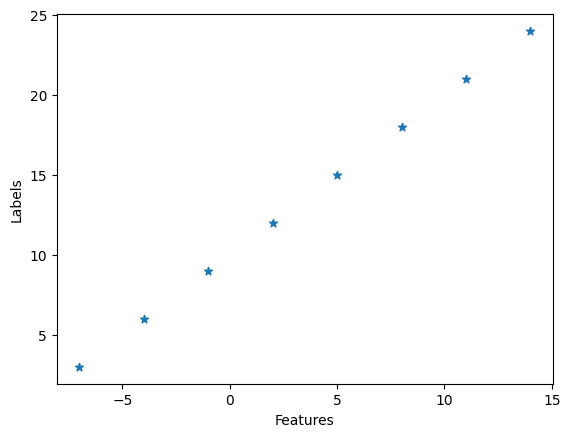

In [4]:
#Visualize
plt.scatter(X,y, marker="*")
plt.xlabel("Features")
plt.ylabel("Labels")

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output shapes

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X = tf.cast(tf.constant(X), tf.float32)
y = tf.cast(tf.constant(y), tf.float32)

In [9]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaulation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [11]:
tf.random.set_seed(42)

In [12]:
#Create a model using sequential api
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

In [13]:
#compile the model
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = tf.keras.losses.mae, metrics = ["mae"])

In [14]:
#fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 14.9086 - mae: 14.9086
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 14.7761 - mae: 14.7761
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 14.6436 - mae: 14.6436
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 14.5111 - mae: 14.5111
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 14.3786 - mae: 14.3786


In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
#prediction using our model
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 201ms/step


In [17]:
y_pred

array([[-3.8166518]], dtype=float32)

In [18]:
y_pred + 11.53

array([[7.713348]], dtype=float32)

## Improving the model
1. **Creating a model**: here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation functions for each layers.
2. **Compiling a model**: here we might change the optimization function or perhaps the **learning rate** (hyperparamater) of the optimization function.
3. **Fitting a model**: here we might fit a model for more **epochs** or we can give more data to train the model.

In [19]:
# Let's rebuild our model

#create the model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

In [20]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

In [21]:
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 977ms/step - loss: 10.9503 - mae: 10.9503
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8178 - mae: 10.8178
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6853 - mae: 10.6853
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5528 - mae: 10.5528
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.4203 - mae: 10.4203
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.2878 - mae: 10.2878
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1553 - mae: 10.1553
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0228 - mae: 10.0228
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 9.8903 - mae: 9.8903
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 9.7578 - mae: 9.7578
Epoch 11/100
1/1 [==============================] - 

In [22]:
# Let's see if our model's preediction has been improved
model.predict([17.0])

1/1 [==============================] - 0s 292ms/step


array([[29.86405]], dtype=float32)

In [23]:
model.predict([15.0])

1/1 [==============================] - 0s 125ms/step


array([[26.447104]], dtype=float32)

In [24]:
#Let's make another change and see if our model will be improved and give us a better prediction

# Create the model and additional 1 more dense layer with 100 neurons with the relu activation function

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (1,)))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(1))

#Compile the new model with Adam optimizer
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

#Fit the model with 100 epochs
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.5271 - mae: 12.5271
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 11.5891 - mae: 11.5891
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6414 - mae: 10.6414
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 9.7012 - mae: 9.7012
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 8.7637 - mae: 8.7637
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 7.8125 - mae: 7.8125
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 6.9461 - mae: 6.9461
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 6.1453 - mae: 6.1453
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 5.3130 - mae: 5.3130
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 4.4497 - mae: 4.4497
Epoch 11/100
1/1 [==============================] - 0s 22ms/step 

In [25]:
#Let's predict the same value again
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[27.685938]], dtype=float32)

In [26]:
model.predict([15.0])

1/1 [==============================] - 0s 139ms/step


array([[25.569687]], dtype=float32)

## Evaluating the model

It's a good idea to visualize:
* The data: what data we're working with? What does it look like?
* The model: What does our model look like?
* The training of a model: How does a model perform while it learns?
* The predictions: How do the predictions of our model line up against the ground truth?


In [27]:
#Let's make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Text(0, 0.5, 'Labels')

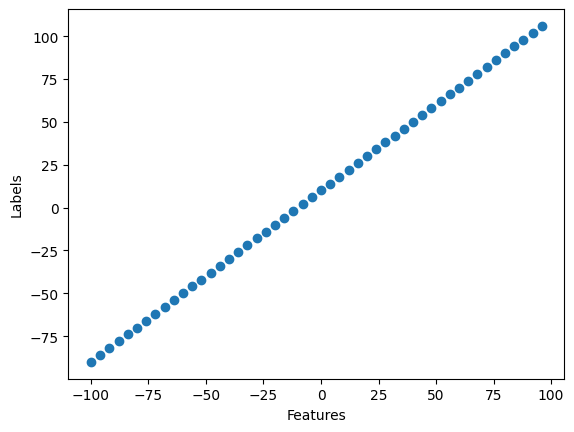

In [29]:
#Visualize the data
plt.scatter(X,y)
plt.xlabel("Features")
plt.ylabel("Labels")

### 3 sets of data

* **Training set**: the model learnsfrom this data, which is typically 70-80% of the total data.
* **Validation set**: the model gets tuned on this data, which is typically 10-15% of the total data.
* **Test data**: the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data

In [30]:
#Check how many samples we have
len(X)

50

In [31]:
# Split the data into train and test sets
X_train = X[:40] #80% of the total data
y_train = y[:40] #80% of the total label data
X_test = X[40:] #20% of the total data
y_test = y[40:] #20% of the total label data

In [32]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we've got our train and test data sets. Let's visualize them.

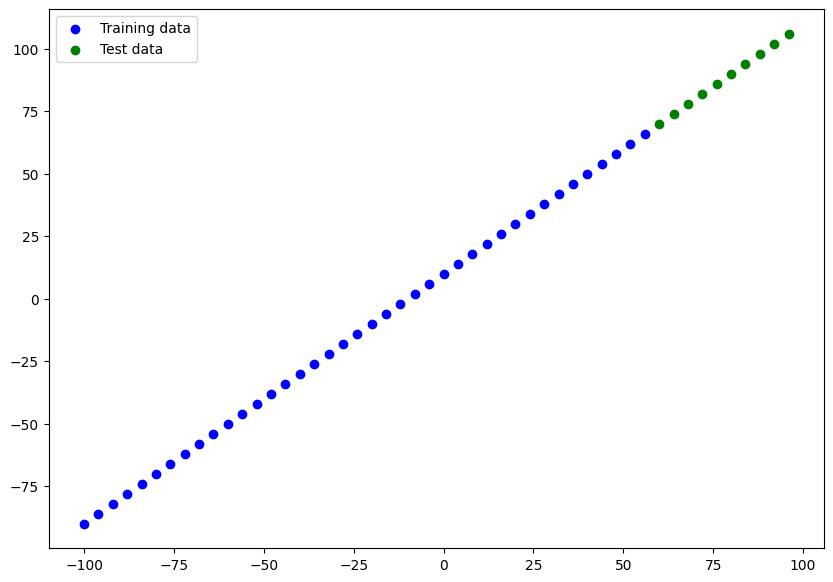

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g", label="Test data")
plt.legend();

In [34]:
# Let's have a look at how to create a neural network for our data
tf.random.set_seed(42)
#Create a model
model = tf.keras.Sequential(name = "first_neural_network")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))

#Compile our model

model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

In [35]:
model.summary()

Model: "first_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 27ms/step - loss: 64.6418 - mae: 64.6418
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 33.7576 - mae: 33.7576
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 31.1374 - mae: 31.1374
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 26.7675 - mae: 26.7675
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 24.7743 - mae: 24.7743
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 20.4187 - mae: 20.4187
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 21.2543 - mae: 21.2543
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 15.8214 - mae: 15.8214
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 30.4607 - mae: 30.4607
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 19.9005 - mae: 19.9005
Epoch 11/100
2/2 [==============================] - 0

In [37]:
model.summary()

Model: "first_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


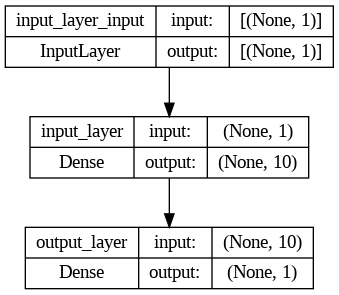

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)

###Visualizing our model's prediction

In [39]:
#Let's make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 358ms/step


array([[42.16835 ],
       [44.88318 ],
       [47.598003],
       [50.312836],
       [53.02766 ],
       [55.74249 ],
       [58.457317],
       [61.17215 ],
       [63.886974],
       [66.60181 ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
#Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize = (10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label = "Test data")
  #Plot predictions in red color
  plt.scatter(test_data, predictions, c="r",label = "Predictions")
  plt.xlabel("Features")
  plt.ylabel("Labels")
  plt.legend()

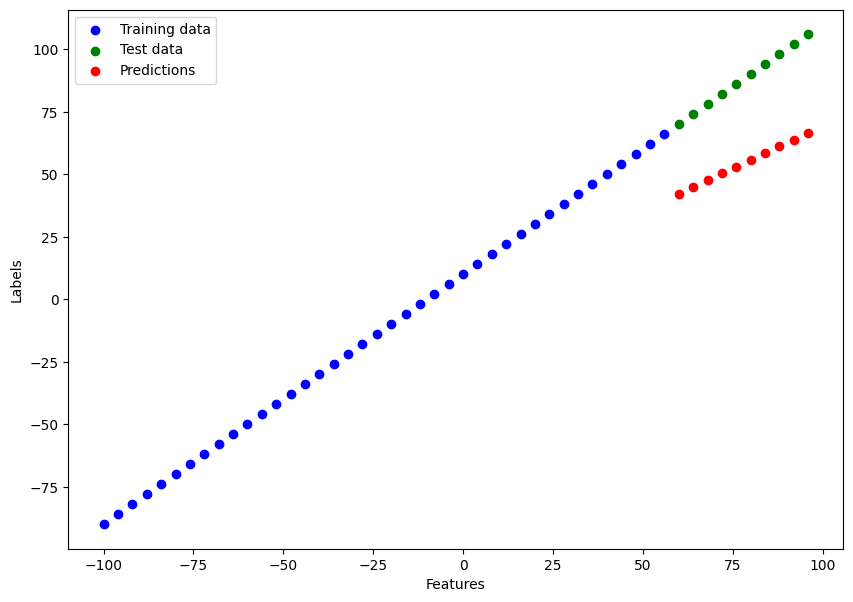

In [42]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

###Evaulating our model's prediction withe regression evaulation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, there are two evaluation metrics:
* **MAE**: Mean Absolute Error
* **MSE**: Mean Squared Error

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 372ms/step - loss: 33.6149 - mae: 33.6149


[33.61492156982422, 33.61492156982422]

In [44]:
y_pred

array([[42.16835 ],
       [44.88318 ],
       [47.598003],
       [50.312836],
       [53.02766 ],
       [55.74249 ],
       [58.457317],
       [61.17215 ],
       [63.886974],
       [66.60181 ]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
#Calculate the Mean Absolute Error
mae = tf.keras.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.83165 , 43.11682 , 40.401997, 37.687164, 34.97234 , 32.25751 ,
       29.542683, 26.82785 , 24.113026, 21.398193], dtype=float32)>

In [47]:
#Calculate Mean Square Error
mse = tf.keras.metrics.mean_squared_error(y_true= y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2232.5403 , 1991.0603 , 1764.3215 , 1552.3224 , 1355.0647 ,
       1172.5471 , 1004.77014,  851.7335 ,  713.43805,  589.8827 ],
      dtype=float32)>

In [48]:
y_pred = tf.constant(y_pred)

In [49]:
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[42.16835 ],
       [44.88318 ],
       [47.598003],
       [50.312836],
       [53.02766 ],
       [55.74249 ],
       [58.457317],
       [61.17215 ],
       [63.886974],
       [66.60181 ]], dtype=float32)>

In [50]:
mae = tf.keras.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.83165 , 43.11682 , 40.401997, 37.687164, 34.97234 , 32.25751 ,
       29.542683, 26.82785 , 24.113026, 21.398193], dtype=float32)>

In [51]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.16835 , 44.88318 , 47.598003, 50.312836, 53.02766 , 55.74249 ,
       58.457317, 61.17215 , 63.886974, 66.60181 ], dtype=float32)>

In [52]:
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=33.61492>

In [53]:
mse = tf.keras.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1143.5894>

###Running experiments to improve our model
1. Get more data - get more examples for your model to understand the patterns between feature and label datas.
2. Make your model larger or in other words increase the complexity. This can be adding more layers or adding more perceptrons which means hidden units or neurons.
3. Train for longer. Increase the epochs number and model will be trained better to understand the patterns in the data.


In [54]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1. `model_1`: same model as the original one but this time train 100 epochs.

2. `model_2`: 2 layers, train 100 epochs

3. `model_3`: 2 layers, train 500 epochs


###**Build model_1**:

In [55]:
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential(name = "model_1")
model_1.add(tf.keras.layers.Input(shape = (1,)))
model_1.add(tf.keras.layers.Dense(1))


#Compile the model
model_1.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.mae,
                metrics = ["mae"])

#Fit the model
model_1.fit(X_train,y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 60.2738 - mae: 60.2738
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.5251 - mae: 25.5251
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 10.7824 - mae: 10.7824
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2419 - mae: 11.2419
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4667 - mae: 12.4667
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.6456 - mae: 9.6456
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7524 - mae: 8.7524
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0735 - mae: 9.0735
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.1799 - mae: 19.1799
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.3629 - mae: 10.3629
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 54ms/step


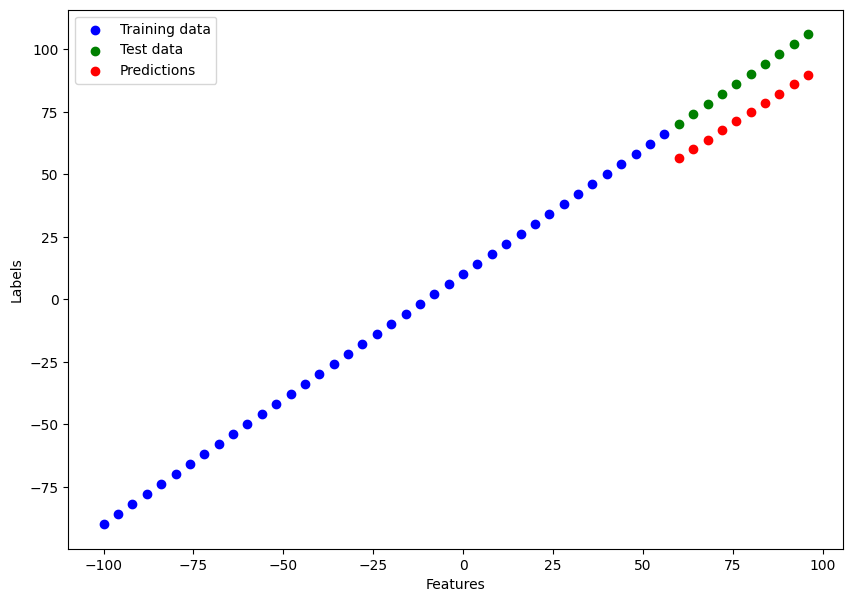

In [56]:
#Make predictions
y_pred_1 = model_1.predict(X_test)
#Plot the predictions
plot_predictions(train_data = X_train,train_labels = y_train,test_data = X_test,test_labels = y_test,predictions = y_pred_1)

In [57]:
#Create model_1 evaluation metrics
mae_1 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))

mse_1 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.980222>,
 <tf.Tensor: shape=(), dtype=float32, numpy=225.25716>)

In [58]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


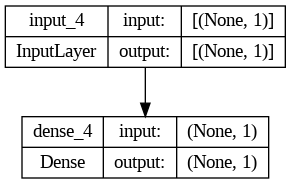

In [59]:
plot_model(model_1, show_shapes = True)

###**Build model_2**:

* 2 dense layers with 100 epochs

In [60]:
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential(name = "model_2")
model_2.add(tf.keras.layers.Dense(10, input_shape = [1]))
model_2.add(tf.keras.layers.Dense(1))

#Compile the model
model_2.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.mae,
                metrics = ["mse"])

#Fit the model
model_2.fit(X_train,y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 52.5311 - mse: 4115.7119
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 16.9489 - mse: 452.3535
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 23.9613 - mse: 839.6093
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5460 - mse: 227.1737
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.4504 - mse: 306.7144
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2629 - mse: 187.9632
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5521 - mse: 162.7942
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2347 - mse: 179.3028
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.1297 - mse: 2836.1372
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 29.3103 - mse: 1215.5641
Epoch 11/100
2/2 [==========================

In [61]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


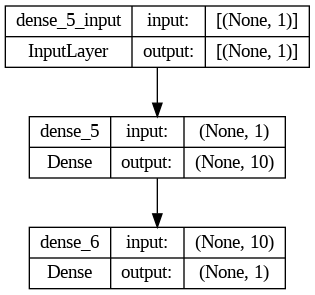

In [62]:
plot_model(model_2, show_shapes = True)

In [63]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 55ms/step


array([[34.868103],
       [37.09665 ],
       [39.325203],
       [41.553753],
       [43.782303],
       [46.010857],
       [48.239403],
       [50.467953],
       [52.696503],
       [54.925056]], dtype=float32)

In [64]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

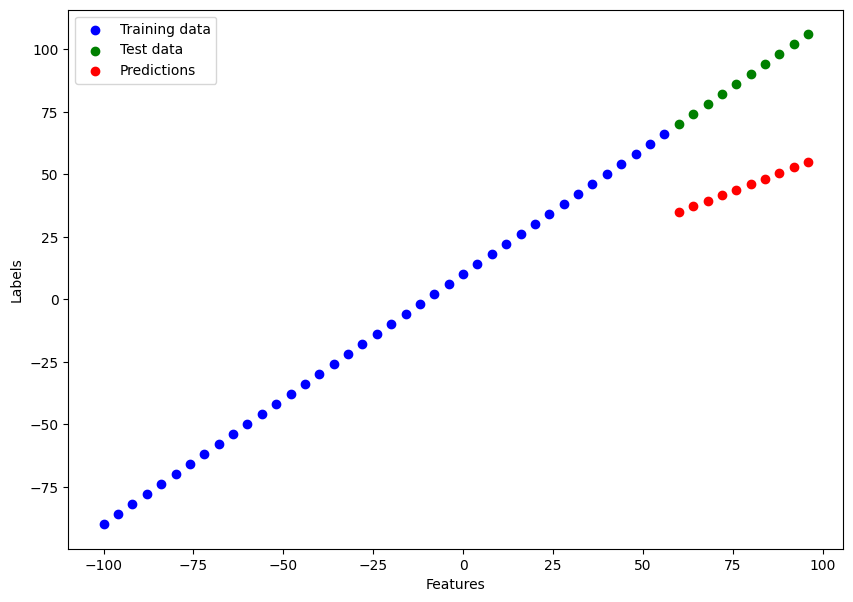

In [65]:
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred_2)

In [66]:
#Calculate evaluation metrics
mae_2 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred_2))

mse_2 = tf.keras.metrics.mse(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=43.10342>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1883.7937>)

###**Build model_3**:

* 2 dense layers with 500 epochs

In [67]:
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential(name = "model_3")
model_3.add(tf.keras.layers.Dense(10, input_shape = [1]))
model_3.add(tf.keras.layers.Dense(1))

#Compile the model
model_3.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.mae,
                metrics = ["mse"])

#Fit the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 43.8989 - mse: 2839.0920
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8051 - mse: 1192.0691
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 35.2947 - mse: 1855.3008
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 25.4141 - mse: 938.1678
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 15.0198 - mse: 284.1378
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.9459 - mse: 171.4081
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.2726 - mse: 153.8648
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1375 - mse: 164.2897
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 40.9628 - mse: 2657.0669
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 28.2935 - mse: 1129.1863
Epoch 11/500
2/2 [========================

In [68]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


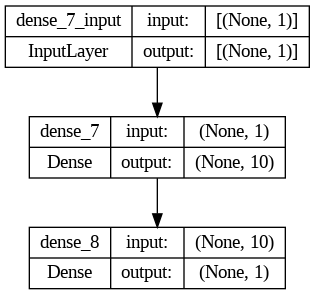

In [69]:
plot_model(model_3, show_shapes = True)

In [70]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 89ms/step


array([[16.410559],
       [17.212072],
       [18.013586],
       [18.8151  ],
       [19.616613],
       [20.418125],
       [21.219639],
       [22.021154],
       [22.822668],
       [23.624182]], dtype=float32)

In [71]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [72]:
#Evaluation metrics of model 3
mae_3 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))

mse_3 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.98263>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4706.038>)

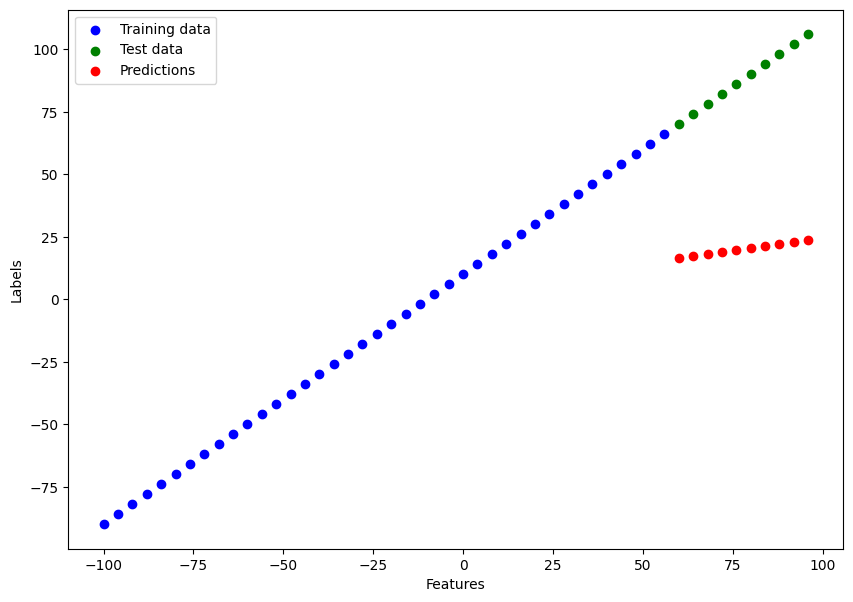

In [73]:
plot_predictions(predictions=y_pred_3)

###Comparing the results of our experiment

In [74]:
#Let's compare our model's results with pandas DataFrame
import pandas as pd

model_result = [["model_1",mae_1.numpy(),mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(data = model_result, columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.980222,225.257156
1,model_2,43.103420,1883.793701
2,model_3,67.982628,4706.038086


In [75]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Tracking your experiments
* **TenseorBoard:** a component of the TensorFlow library to help tracking modelling experiments.
* **Weights & Biases:** a tool for tracking all kinds of machine learning experiments

##Saving our models

In [76]:
#Save a model using SavedModel format
model_2.save("best_model_SavedModel_format")

In [77]:
#Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Loading a saved model

In [78]:
loaded_saved_model_format = tf.keras.models.load_model("best_model_SavedModel_format")

In [79]:
loaded_saved_model_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model2_pred = model_2.predict(X_test)
saved_model_pred = loaded_saved_model_format.predict(X_test)
model2_pred == saved_model_pred

1/1 [==============================] - 0s 92ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [81]:
model2_pred, saved_model_pred

(array([[34.868103],
        [37.09665 ],
        [39.325203],
        [41.553753],
        [43.782303],
        [46.010857],
        [48.239403],
        [50.467953],
        [52.696503],
        [54.925056]], dtype=float32),
 array([[34.868103],
        [37.09665 ],
        [39.325203],
        [41.553753],
        [43.782303],
        [46.010857],
        [48.239403],
        [50.467953],
        [52.696503],
        [54.925056]], dtype=float32))

In [82]:
tf.keras.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(model2_pred)) == tf.keras.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(saved_model_pred))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [83]:
tf.keras.metrics.mean_squared_error(y_true = y_test, y_pred =tf.squeeze(model2_pred)) == tf.keras.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(saved_model_pred))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

###Larger DataSet

In [84]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [86]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [87]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [88]:
#Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [89]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [90]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [91]:
#Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [92]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [93]:
#Build a neural network
tf.random.set_seed(42)

#Create the model
model_insurance = tf.keras.Sequential()
model_insurance.add(tf.keras.layers.Dense(10))
model_insurance.add(tf.keras.layers.Dense(1))

#Compile the model
model_insurance.compile(optimizer = tf.keras.optimizers.SGD(),
                        loss = tf.keras.losses.mae,
                        metrics = ["mae"])

#Fit the model
model_insurance.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8654.8770 - mae: 8654.8770
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7841.2617 - mae: 7841.2617
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7549.8643 - mae: 7549.8643
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7860.9683 - mae: 7860.9683
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.4980 - mae: 7671.4980
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7562.3599 - mae: 7562.3599
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.1982 - mae: 7574.1982
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7807.0908 - mae: 7807.0908
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7552.6348 - mae: 7552.6348
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7563.6348 - mae: 7563.6348

In [94]:
#Check the results of the insurance model on the test data

y_pred_insurance = model_insurance.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [95]:
#Evaluation
mae_insurance = tf.keras.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred_insurance))
mae_insurance

<tf.Tensor: shape=(), dtype=float32, numpy=8453.168>

In [96]:
mse_insurance = tf.keras.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred_insurance))
mse_insurance

<tf.Tensor: shape=(), dtype=float32, numpy=106966380.0>

In [97]:
model_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8453.1670 - mae: 8453.1670


[8453.1669921875, 8453.1669921875]

##Improving our model
1. Add an extra layer with more hidden units and use Adam optimizer
2. Increase the epochs

In [98]:
#Set random_seed
tf.random.set_seed(42)

#Create the model
model_insurance_2 = tf.keras.Sequential()
model_insurance_2.add(tf.keras.layers.Dense(100))
model_insurance_2.add(tf.keras.layers.Dense(10))
model_insurance_2.add(tf.keras.layers.Dense(1))

#Compile the model
model_insurance_2.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.mae,
                          metrics = ["mse"])

#Fit the model
model_insurance_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13292.9072 - mse: 320917856.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13110.4600 - mse: 315731776.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12732.8984 - mse: 305305728.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12005.9053 - mse: 286172736.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10818.5576 - mse: 256830496.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9345.2188 - mse: 219712816.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8048.5513 - mse: 184167472.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.0542 - mse: 161576016.0000
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7410.6802 - mse: 154880736.0000
Epoch 10/100
34/34 [==============================

In [99]:
model_insurance_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4670.3350 - mse: 91598936.0000


[4670.3349609375, 91598936.0]

In [100]:
model_insurance_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               1200      
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


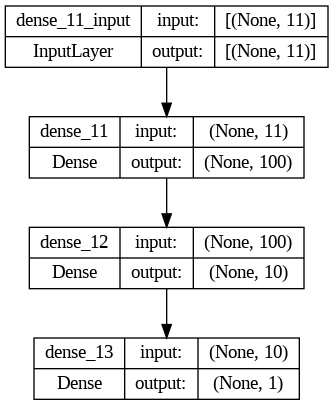

In [101]:
plot_model(model_insurance_2, show_shapes = True)

In [102]:
#set radom_seed
tf.random.set_seed(42)

#Create the model
model_insurance_3 = tf.keras.Sequential()
model_insurance_3.add(tf.keras.layers.Dense(100))
model_insurance_3.add(tf.keras.layers.Dense(10))
model_insurance_3.add(tf.keras.layers.Dense(1))

#Compile the model
model_insurance_3.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.mae,
                          metrics = ["mae"])

#Fit the model
history = model_insurance_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13318.3135 - mae: 13318.3135
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13191.3574 - mae: 13191.3574
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12925.8291 - mae: 12925.8291
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12379.2090 - mae: 12379.2090
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11394.2510 - mae: 11394.2510
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9985.9170 - mae: 9985.9170
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8522.7344 - mae: 8522.7344
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7630.3760 - mae: 7630.3760
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7438.4004 - mae: 7438.4004
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7413.0947 - mae:

In [103]:
model_insurance_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3499.6870 - mae: 3499.6870


[3499.68701171875, 3499.68701171875]

In [104]:
model_insurance_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


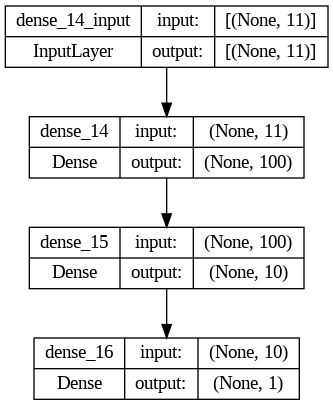

In [105]:
plot_model(model_insurance_3, show_shapes = True)

Text(0.5, 0, 'epochs')

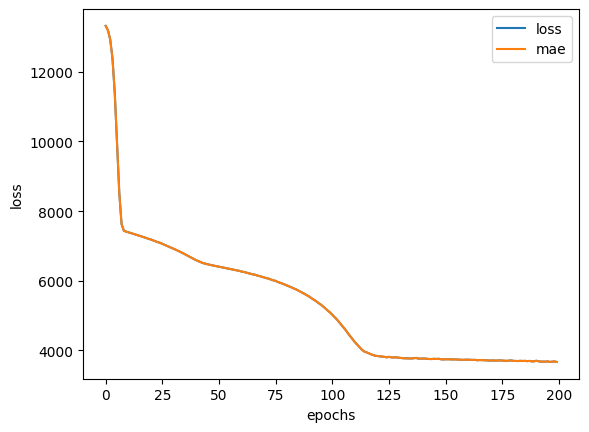

In [106]:
#Plot history (also known as a loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

##Preprocessing data (Normalization and Standardization)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [108]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [109]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [111]:
#Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex","smoker","region"])
)

#Create X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with Normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [112]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [113]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [114]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [116]:
#Build a neural network model to fit on our normalized data

tf.random.set_seed(42)

#Create the model
model_insurance_4 = tf.keras.Sequential()
model_insurance_4.add(tf.keras.layers.Dense(100))
model_insurance_4.add(tf.keras.layers.Dense(10))
model_insurance_4.add(tf.keras.layers.Dense(1))

#Compile the model
model_insurance_4.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.mae,
                          metrics = ["mae"])

#Fit the model
model_insurance_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.1719 - mae: 13343.1719
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13334.0459 - mae: 13334.0459
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13311.6016 - mae: 13311.6016
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13265.8311 - mae: 13265.8311
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13186.1191 - mae: 13186.1191
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13061.6191 - mae: 13061.6191
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12882.1104 - mae: 12882.1104
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12637.5254 - mae: 12637.5254
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12317.6436 - mae: 12317.6436
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11918.25

In [117]:
model_insurance_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.8083 - mae: 3438.8083


[3438.808349609375, 3438.808349609375]

In [119]:
#9/9 [==============================] - 0s 3ms/step - loss: 4670.3350 - mse: 91598936.0000
#[4670.3349609375, 91598936.0]

##After normalization of our feature data with using the same model and hyperparameters mean absolute error decreased even from our best previous evaluation score.